# Supervised learning examples

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

## Simple Regression Example

### Sample data

In [2]:
# Feature X: Apartment Size in Square Meters (sq. m)
X = np.array([
    [50], [65], [70], [80], [95],
    [100], [110], [125], [130], [145],
    [150], [160]
])

# Target (label) y: Apartment Price (in thousands of dollars)
y = np.array([
    155, 178, 185, 215, 248,
    265, 275, 305, 318, 350,
    355, 375
])

### Modelling

Fit the model

In [3]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
### Find model parameters
m = model.coef_[0]
b = model.intercept_

print(f"Intercept (Base Price): ${b:.2f} thousand")
print(f"Coefficient (Price per sq. meter): ${m:.2f} thousand per sq. m")

Intercept (Base Price): $49.21 thousand
Coefficient (Price per sq. meter): $2.06 thousand per sq. m


The specific mathematical model found is 

Price≈2.06×Size + $49.21

From slope-intercept form of a line, y = m.x + b

### Plot the data and regression line

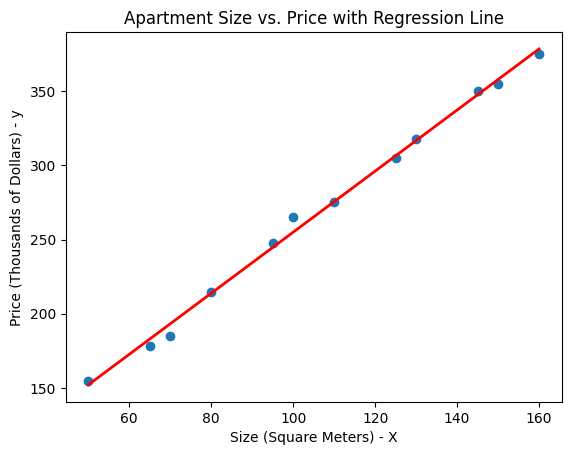

In [5]:
# Create line values
x_line = np.linspace(X.min(), X.max(), 100)
y_line = m * x_line + b

# Plot original data
plt.scatter(X, y, label="Data", colorizer='blue')

# Plot regression line
plt.plot(x_line, y_line, label=f"y = {m:.2f}x + {b:.2f}", linewidth=2, color='red')

plt.title('Apartment Size vs. Price with Regression Line')
plt.xlabel('Size (Square Meters) - X')
plt.ylabel('Price (Thousands of Dollars) - y')
plt.show()

### Prediction on new data

In [6]:
new_size = np.array([[120]]) # 120 sq. meters
y_pred = model.predict(new_size)
print(f"\nPredicted price for 120 sq. m: ${y_pred[0]:.2f} thousand")


Predicted price for 120 sq. m: $296.10 thousand


## Simple Classification Example

### Sample data

In [7]:
# Features: [Age, Salary]
X = np.array([
    [22, 20000],
    [25, 25000],
    [47, 52000],
    [52, 60000]
])

# Label: Bought (0 = No, 1 = Yes)
y = np.array([0, 0, 1, 1])

### Plot the data

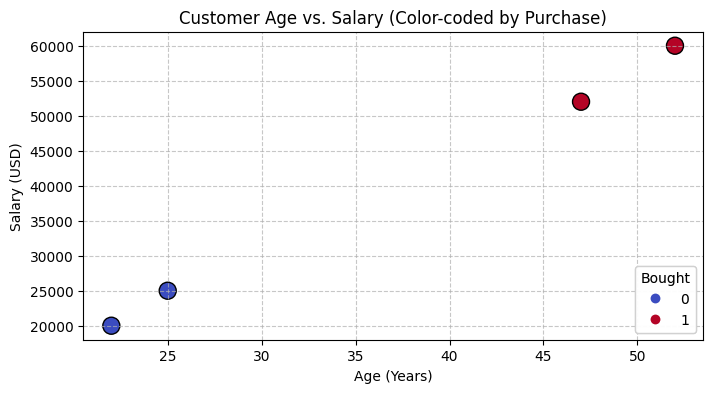

In [8]:
age = X[:, 0]
salary = X[:, 1]

plt.figure(figsize=(8, 4))

scatter = plt.scatter(age, salary, c=y, cmap='coolwarm', s=150, edgecolors='k')

plt.title('Customer Age vs. Salary (Color-coded by Purchase)')
plt.xlabel('Age (Years)')
plt.ylabel('Salary (USD)')

legend1 = plt.legend(*scatter.legend_elements(),
                     title="Bought",
                     loc="lower right")

plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Modelling

In [9]:
clf = LogisticRegression()
clf.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Prediction on new data

In [10]:
age = 45
salary = 70000
probability = clf.predict_proba([[age, salary]])[0][1]
print(f"\nProbability of buying for age {age} and salary ${salary}: {probability:.2f}")



Probability of buying for age 45 and salary $70000: 1.00
